<a href="https://colab.research.google.com/github/DivyaRoopa123/Intern-week--1/blob/main/week_3_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
!pip install python-docx


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from docx import Document
import joblib

plt.rcParams['figure.figsize'] = (8,5)


In [85]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

df = pd.read_csv(file_name)
df.head()


Saving student_scores (2).csv to student_scores (2) (11).csv
Uploaded file: student_scores (2) (11).csv


,Hours_Studied,Exam_Score
0,5.94,21.17
1,7.44,46.95
2,6.42,29.55
3,5.90,27.31
4,4.81,17.79


In [86]:
print("\n===== FINAL SUMMARY =====")
print(comparison)
print("\nBetter Model based on RMSE:",
      "Random Forest" if rf_rmse < lr_rmse else "Linear Regression")



===== FINAL SUMMARY =====
               Model       MAE        MSE      RMSE  R2 Score
0  Linear Regression  3.010523  13.909080  3.729488  0.907837
1      Random Forest  4.831000  30.794356  5.549266  0.795954

Better Model based on RMSE: Linear Regression


In [87]:
comparison.to_csv("model_comparison.csv", index=False)

doc = Document()
doc.add_heading("Model Comparison", level=1)

table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Model"
hdr_cells[1].text = "MAE"
hdr_cells[2].text = "MSE"
hdr_cells[3].text = "RMSE"
hdr_cells[4].text = "R2 Score"

for i, row in comparison.iterrows():
    cells = table.add_row().cells
    cells[0].text = row["Model"]
    cells[1].text = str(round(row["MAE"],4))
    cells[2].text = str(round(row["MSE"],4))
    cells[3].text = str(round(row["RMSE"],4))
    cells[4].text = str(round(row["R2 Score"],4))

doc.save("model_comparison.docx")
print("Saved model_comparison.docx and model_comparison.csv")


Saved model_comparison.docx and model_comparison.csv


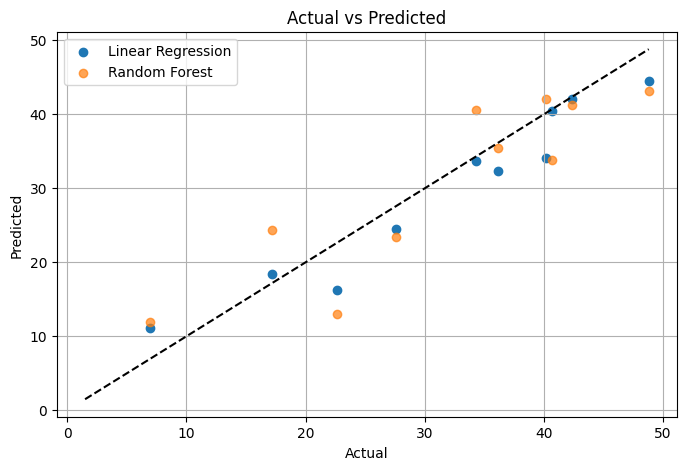

In [88]:
plt.scatter(y_test, y_pred_lr, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [89]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "MSE": [lr_mse, rf_mse],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2]
})

comparison


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,3.010523,13.909080,3.729488,0.907837
1,Random Forest,4.831000,30.794356,5.549266,0.795954


In [90]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
}

grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred_rf = best_rf.predict(X_test)

rf_mae, rf_mse, rf_rmse, rf_r2 = regression_metrics(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Random Forest Results:
MAE: 4.83099999999999
MSE: 30.794356239999985
RMSE: 5.549266279428298
R2: 0.7959535241123505


In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

lr_mae, lr_mse, lr_rmse, lr_r2 = regression_metrics(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R2:", lr_r2)


Linear Regression Results:
MAE: 3.010523426743098
MSE: 13.909079875124288
RMSE: 3.729487883761561
R2: 0.9078370494502359


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (40, 1) Test: (10, 1)


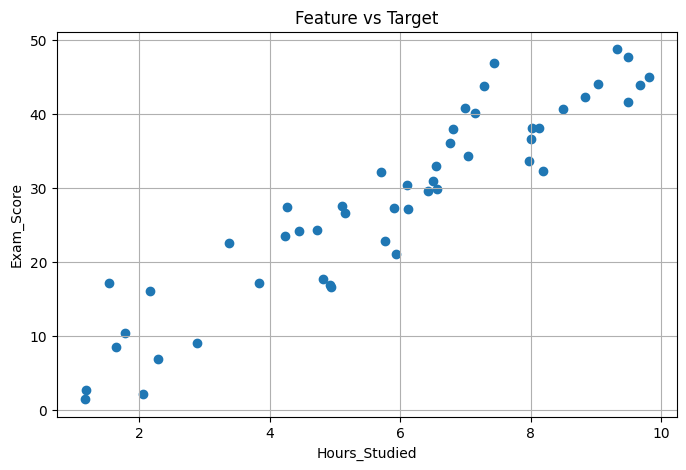

In [93]:
plt.scatter(X.iloc[:,0], y)
plt.xlabel(FEATURE_COLS[0])
plt.ylabel(TARGET_COL)
plt.title("Feature vs Target")
plt.grid(True)
plt.show()


In [94]:
print(df.columns)

FEATURE_COLS = ['Hours_Studied']
TARGET_COL = 'Exam_Score'

X = df[FEATURE_COLS]
y = df[TARGET_COL]


Index(['Hours_Studied', 'Exam_Score'], dtype='object')


In [95]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (50, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  50 non-null     float64
 1   Exam_Score     50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


,Hours_Studied,Exam_Score
count,50.00000,50.000000
mean,5.84120,28.343400
std,2.47562,12.836373
min,1.17000,1.500000
25%,4.31500,18.635000
50%,6.11500,29.730000
75%,7.83750,38.097500
max,9.81000,48.790000
